<a href="https://colab.research.google.com/github/AshikaAnand12/DimensionalityReduction/blob/main/DimensionReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Compression Using PCA**

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(768, 1024, 3)


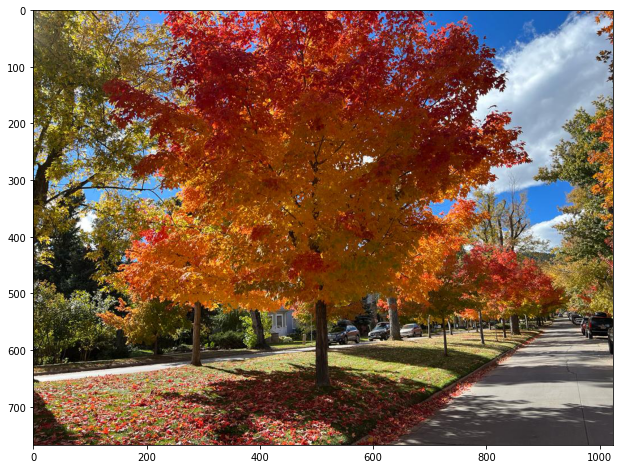

In [ ]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/content/gdrive")

image_raw = imread('/content/gdrive/My Drive/Kaggle/ImageCompression.JPG')
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

(768, 1024)
1.0


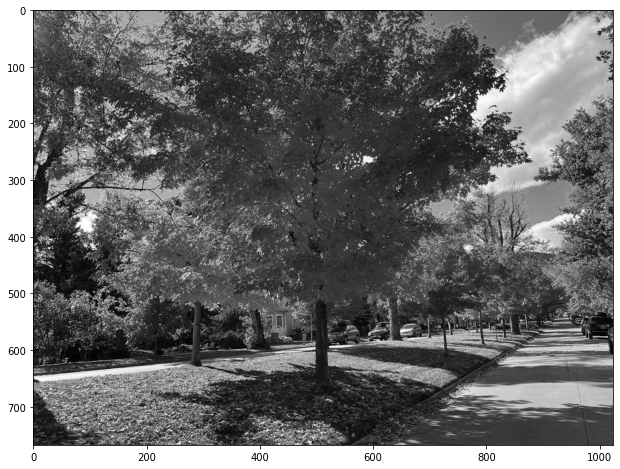

In [ ]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

Number of components explaining 95% variance: 279


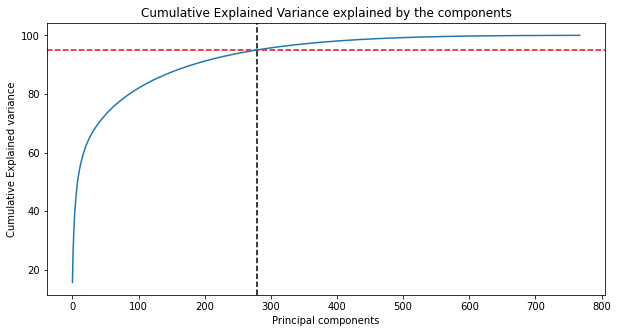

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

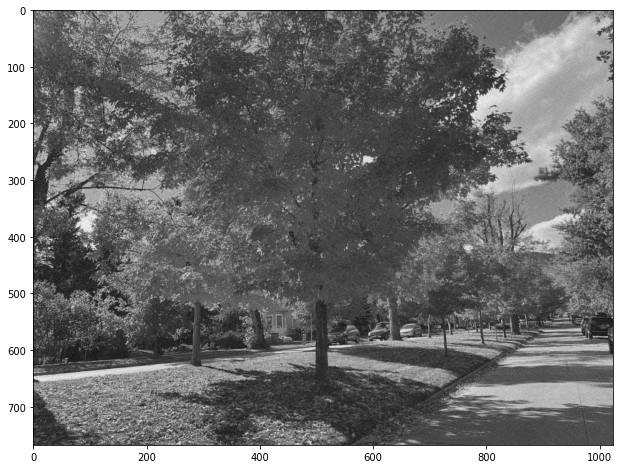

In [ ]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

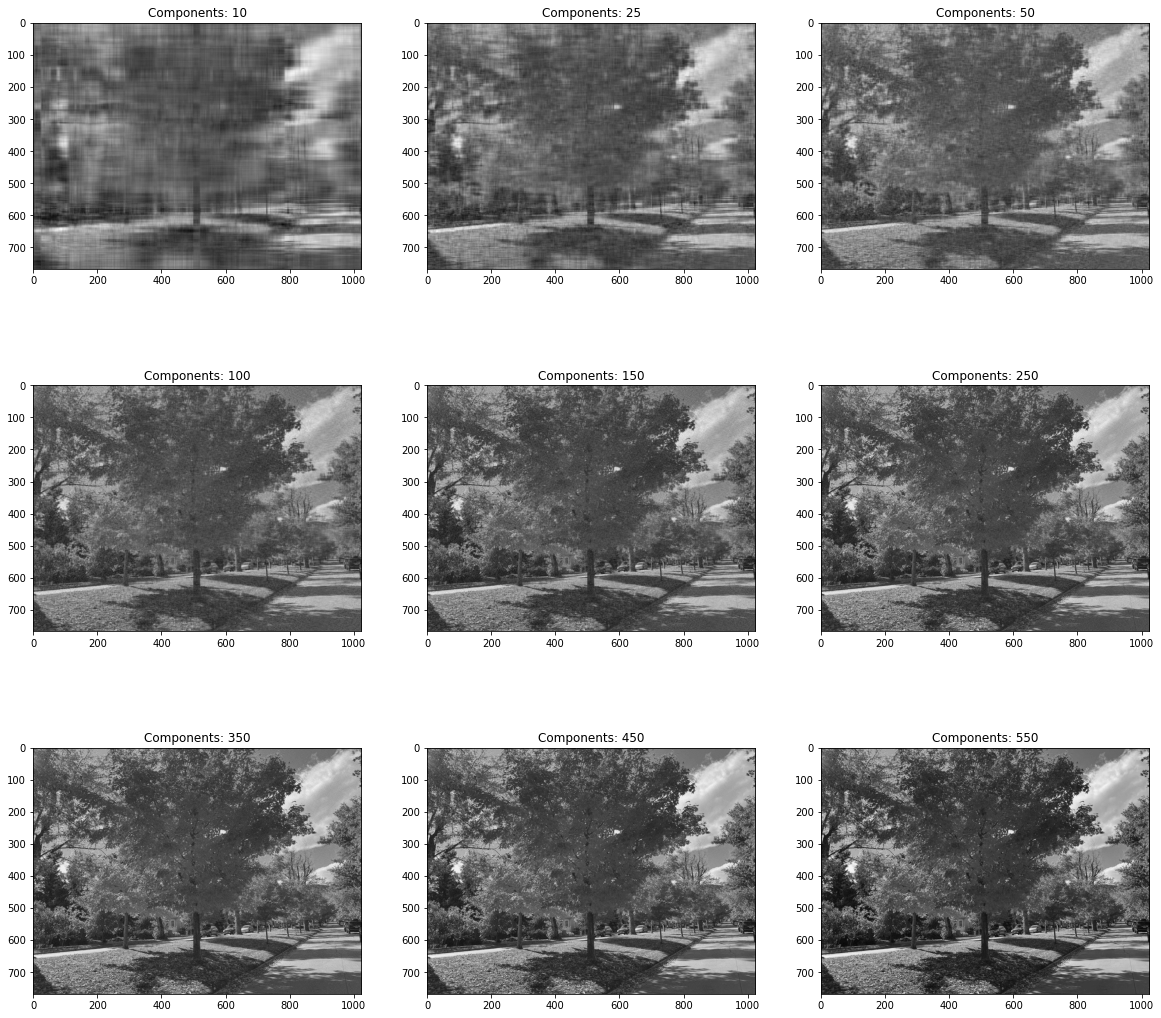

In [ ]:
ks = [10, 25, 50, 100, 150, 250, 350, 450, 550]

plt.figure(figsize=[20,20])

for i in range(9):
    plt.subplot(3,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

# **Image Compression using SVD**

(768, 1024, 3)


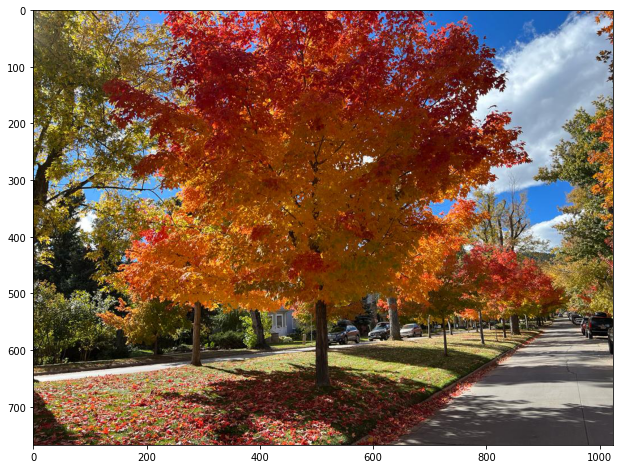

In [ ]:
img = imread('/content/gdrive/My Drive/Kaggle/ImageCompression.JPG')
print(img.shape)

plt.figure(figsize=[12,8])
plt.imshow(img)